In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [3]:
#one hot encoding
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

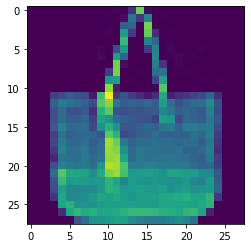

In [4]:
# sample image from the training set
plt.imshow(X_train[35])

In [20]:
# Creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=256,activation='relu'))
he model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [21]:
# creating an instance for the early stopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [22]:
# fitting the training set to the model and validating on the test set
model.fit(x=X_train,y=y_cat_train,epochs=200,validation_data=(X_test,y_cat_test),verbose=1,callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 19s 324us/sample - loss: 1.0090 - accuracy: 0.7498 - val_loss: 0.5255 - val_accuracy: 0.8153
Epoch 2/200
60000/60000 [==============================] - 15s 243us/sample - loss: 0.4886 - accuracy: 0.8264 - val_loss: 0.4870 - val_accuracy: 0.8216
Epoch 3/200
60000/60000 [==============================] - 15s 255us/sample - loss: 0.4355 - accuracy: 0.8433 - val_loss: 0.4426 - val_accuracy: 0.8403
Epoch 4/200
60000/60000 [==============================] - 15s 255us/sample - loss: 0.3996 - accuracy: 0.8560 - val_loss: 0.5104 - val_accuracy: 0.8337
Epoch 5/200
60000/60000 [==============================] - 16s 262us/sample - loss: 0.3793 - accuracy: 0.8631 - val_loss: 0.4001 - val_accuracy: 0.8548
Epoch 6/200
60000/60000 [==============================] - 16s 272us/sample - loss: 0.3620 - accuracy: 0.8695 - val_loss: 0.4021 - val_accuracy: 0.8599
Epoch 7/200
60000/60000 [=============

In [23]:
# Storing the result of the training

results = pd.DataFrame(model.history.history)
results

,loss,accuracy,val_loss,val_accuracy
0,1.008979,0.749750,0.525453,0.8153
1,0.488558,0.826433,0.487021,0.8216
2,0.435482,0.843283,0.442565,0.8403
3,0.399559,0.855983,0.510363,0.8337
4,0.379255,0.863067,0.400094,0.8548
5,0.362033,0.869533,0.402147,0.8599
6,0.343483,0.875950,0.407307,0.8545
7,0.330794,0.880433,0.382470,0.8703
8,0.321522,0.884433,0.378031,0.8729
9,0.312480,0.887550,0.373527,0.8704


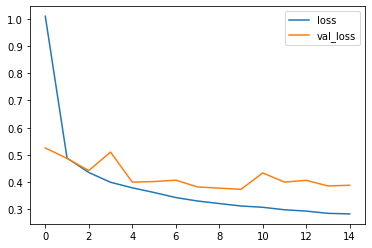

In [24]:
results[['loss','val_loss']].plot()

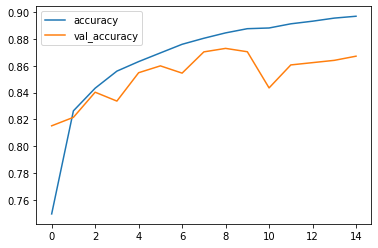

In [25]:
results[['accuracy','val_accuracy']].plot()

In [26]:
# making predictions using the model on the test set
predictions = model.predict_classes(X_test)
true_value = list(y_test)
predictions = list(predictions)
sub = pd.DataFrame({'True Value':true_value,'Predictions':predictions})
sub.to_csv('./True_VS_Predicted_Fashion_MNIST_ANN.csv',index=False)

In [28]:
# evaluating using the confusion matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,predictions)
con_mat

array([[718,   1,  14,  35,   2,   2, 206,   0,  22,   0],
       [  1, 962,   1,  28,   2,   0,   2,   0,   4,   0],
       [  6,   0, 728,  15, 105,   0, 105,   0,  41,   0],
       [ 17,   1,   7, 898,  33,   0,  35,   0,   9,   0],
       [  0,   1,  76,  39, 789,   0,  78,   0,  17,   0],
       [  0,   0,   0,   0,   0, 957,   0,  25,   3,  15],
       [ 79,   1,  68,  31,  51,   0, 709,   0,  61,   0],
       [  0,   0,   0,   0,   0,  12,   0, 963,   0,  25],
       [  2,   0,   1,   5,   3,   1,   3,   3, 982,   0],
       [  1,   0,   0,   0,   0,   3,   0,  31,   0, 965]], dtype=int64)